# K-Means Clustering on Credit

K-means is an **unsupervised learning** algorithm that learns the features of a dataset and tries to "figure out" the groups (categories, which are the "k" value) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean of a cluster group. K-means can help identify segments of data points that have similar features, even though they may not belong to the same target category. Unsupervised learning is less about trying to predict the correct categories, moreso than it is about finding trends of data points that seem to be similar. 

![Supervised vs Unsupervised learning](https://notebooks.azure.com/priesterkc/projects/testdb/raw/kmeans_cluster.png)

Source: [Towards Data Science: Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "CC GENERAL.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df = df.drop('CUST_ID', axis = 1) 
df.fillna(method ='ffill', inplace = True) 
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
X = df

In [5]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=8)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[3.97506450e+03 9.56544554e-01 4.91069112e+02 2.73759034e+02
  2.17343951e+02 3.52886517e+03 3.08101727e-01 1.31467400e-01
  2.10991309e-01 3.68339383e-01 1.01248780e+01 8.49170732e+00
  6.29241094e+03 2.67203409e+03 1.52658610e+03 2.86316273e-02
  1.14643902e+01]
 [5.18347658e+03 8.76681796e-01 1.45105673e+03 8.68528319e+02
  5.82723097e+02 1.08991158e+04 3.51573558e-01 1.93545743e-01
  2.73857425e-01 4.97731097e-01 2.07522124e+01 1.83008850e+01
  1.08491150e+04 1.55667252e+04 2.11069247e+03 1.45884186e-01
  1.16814159e+01]
 [2.33415924e+03 9.68663467e-01 6.49763142e+03 4.38527930e+03
  2.11409125e+03 5.35919189e+02 9.11329241e-01 7.01001322e-01
  7.03154754e-01 7.10803449e-02 1.91884058e+00 7.30492754e+01
  8.00391304e+03 6.49391844e+03 1.13576528e+03 3.20678386e-01
  1.19275362e+01]
 [5.71660247e+03 9.45104470e-01 1.59769152e+03 9.77660221e+02
  6.20179095e+02 2.15045733e+03 5.56574015e-01 3.29973554e-01
  3.98284179e-01 2.21250567e-01 5.53421634e+00 2.29536424e+01
  1.34822296e+04

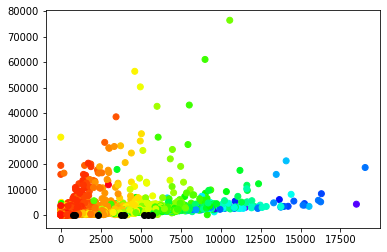

In [7]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df['BALANCE'],df['MINIMUM_PAYMENTS'], c=df['CREDIT_LIMIT'], cmap= 'hsv')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [8]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df['cluster'] = kmeans.labels_

**Category number and cluster number will not always be the same!**

Cluster number is assigned based on the index number of the centroid a data point is closest to.

In [9]:
#dataframe with new cluster column
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


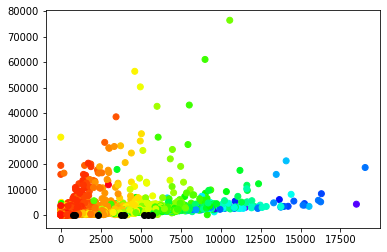

In [10]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(df['BALANCE'],df['MINIMUM_PAYMENTS'], c=df['CREDIT_LIMIT'], cmap= 'hsv')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [11]:
#predict category of new data point
#kpred = [35,400,89,25, 230,100,35,400,89, 300,35,400,89, 230,1000,450,10000]
kpred = [5.71660247e+03, 9.45104470e-01, 1.59769152e+03, 9.77660221e+02,
  6.20179095e+02, 2.15045733e+03, 5.56574015e-01, 3.29973554e-01,
  3.98284179e-01, 2.21250567e-01, 5.53421634e+00, 2.29536424e+01,
  1.34822296e+04, 2.59151512e+03, 1.84797135e+03, 1.10320168e-01,
  1.18631347e+01]
#model thinks new data point belongs to upper-left cluster
#[[50,50]] is 2D
print(kmeans.predict([kpred]))

[3]


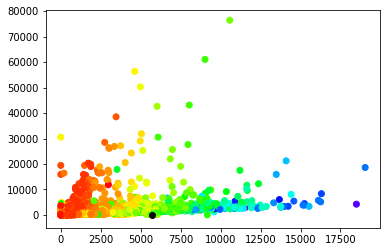

In [12]:
#see plot of new data point
#c=color
#k-means predicted clusters (in color) for the data points
plt.scatter(df['BALANCE'],df['MINIMUM_PAYMENTS'], c=df['CREDIT_LIMIT'], cmap= 'hsv')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')